In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [2]:
train_x_orig,train_y,test_x_orig,test_y,classes=load_data()

y = 1.Its a catpictures


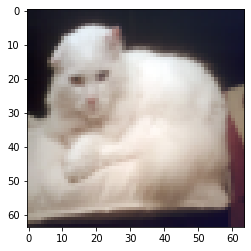

In [3]:
index=13
plt.imshow(train_x_orig[index])
print("y = "+str(train_y[0,index])+".Its a "+classes[train_y[0,index]].decode("utf-8")+"pictures")

In [4]:
m_train=train_x_orig.shape[0]
num_px=train_x_orig.shape[1]
m_test=test_x_orig.shape[0]

print("Number of training examples: "+str(m_train))
print("Number of testing examples: "+str(m_test))
print("Each image is of size:( "+str(num_px)+', '+str(num_px)+', 3)')
print("train_x_orig shape "+str(train_x_orig.shape))
print("train_y shape "+str(train_y.shape))
print("test_x_orig shape "+str(test_x_orig.shape))
print("test_y shape "+str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size:( 64, 64, 3)
train_x_orig shape (209, 64, 64, 3)
train_y shape (1, 209)
test_x_orig shape (50, 64, 64, 3)
test_y shape (1, 50)


In [5]:
train_x_flatten=train_x_orig.reshape(train_x_orig.shape[0],-1).T
test_x_flatten=test_x_orig.reshape(test_x_orig.shape[0],-1).T

train_x=train_x_flatten/255
test_x=test_x_flatten/255

print("train_x's shape"+str(train_x.shape))
print("test x's shape"+str(test_x.shape))

train_x's shape(12288, 209)
test x's shape(12288, 50)


In [6]:
n_x=12288
n_h=7
n_y=1
layers_dims=(n_x,n_h,n_y)

In [14]:
def two_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False):
    np.random.seed(1)
    grads = {}
    costs = []                          
    m = X.shape[1]                           
    (n_x, n_h, n_y) = layers_dims
    
    parameters = initialize_parameters(n_x, n_h, n_y)

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    for i in range(0, num_iterations):

            A1, cache1 = linear_activation_forward(X, W1, b1, 'relu')
            A2, cache2 = linear_activation_forward(A1, W2, b2, 'sigmoid')

            cost = compute_cost(A2, Y)

            dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))


            dA1, dW2, db2 = linear_activation_backward(dA2, cache2, 'sigmoid')
            dA0, dW1, db1 = linear_activation_backward(dA1, cache1, 'relu')

            grads['dW1'] = dW1
            grads['db1'] = db1
            grads['dW2'] = dW2
            grads['db2'] = db2

            parameters = update_parameters(parameters, grads, learning_rate)

            W1 = parameters["W1"]
            b1 = parameters["b1"]
            W2 = parameters["W2"]
            b2 = parameters["b2"]

            if print_cost and i % 100 == 0:
                print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
            if print_cost and i % 100 == 0:
                costs.append(cost)
       

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.6930497356599888
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912677
Cost after iteration 300: 0.6015024920354665
Cost after iteration 400: 0.5601966311605747
Cost after iteration 500: 0.5158304772764729
Cost after iteration 600: 0.47549013139433255
Cost after iteration 700: 0.43391631512257495
Cost after iteration 800: 0.4007977536203886
Cost after iteration 900: 0.3580705011323798
Cost after iteration 1000: 0.3394281538366412
Cost after iteration 1100: 0.3052753636196264
Cost after iteration 1200: 0.2749137728213015
Cost after iteration 1300: 0.24681768210614846
Cost after iteration 1400: 0.19850735037466108
Cost after iteration 1500: 0.17448318112556654
Cost after iteration 1600: 0.17080762978096023
Cost after iteration 1700: 0.11306524562164728
Cost after iteration 1800: 0.09629426845937154
Cost after iteration 1900: 0.08342617959726861
Cost after iteration 2000: 0.07439078704319084
Cost after iteration 2100: 0.0663074

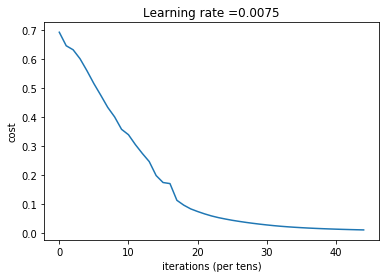

In [21]:
parameters=two_layer_model(train_x,train_y,layers_dims=(n_x,n_h,n_y),num_iterations=4500,print_cost=True)

In [22]:
pred_train=predict(train_x,train_y,parameters)

Accuracy: 0.9999999999999998


In [23]:
pred_test=predict(test_x,test_y,parameters)

Accuracy: 0.7000000000000001


In [24]:
def L_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False): #lr was 0.009

    np.random.seed(1)
    costs = []                        
    
    parameters = initialize_parameters_deep(layers_dims)
    
    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)
        
        cost = compute_cost(AL, Y)
        
        grads = L_model_backward(AL, Y, caches)

        parameters = update_parameters(parameters, grads, learning_rate)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.695046
Cost after iteration 100: 0.589260
Cost after iteration 200: 0.523261
Cost after iteration 300: 0.449769
Cost after iteration 400: 0.420900
Cost after iteration 500: 0.372464
Cost after iteration 600: 0.347421
Cost after iteration 700: 0.317192
Cost after iteration 800: 0.266438
Cost after iteration 900: 0.219914
Cost after iteration 1000: 0.143579
Cost after iteration 1100: 0.453092
Cost after iteration 1200: 0.094994
Cost after iteration 1300: 0.080141
Cost after iteration 1400: 0.069402
Cost after iteration 1500: 0.060217
Cost after iteration 1600: 0.053274
Cost after iteration 1700: 0.047629
Cost after iteration 1800: 0.042976
Cost after iteration 1900: 0.039036
Cost after iteration 2000: 0.035683
Cost after iteration 2100: 0.032915
Cost after iteration 2200: 0.030472
Cost after iteration 2300: 0.028388


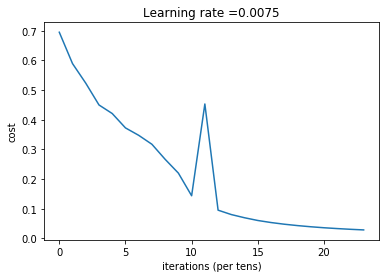

In [28]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations=2400, print_cost=True)

In [29]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9999999999999998


In [30]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.74


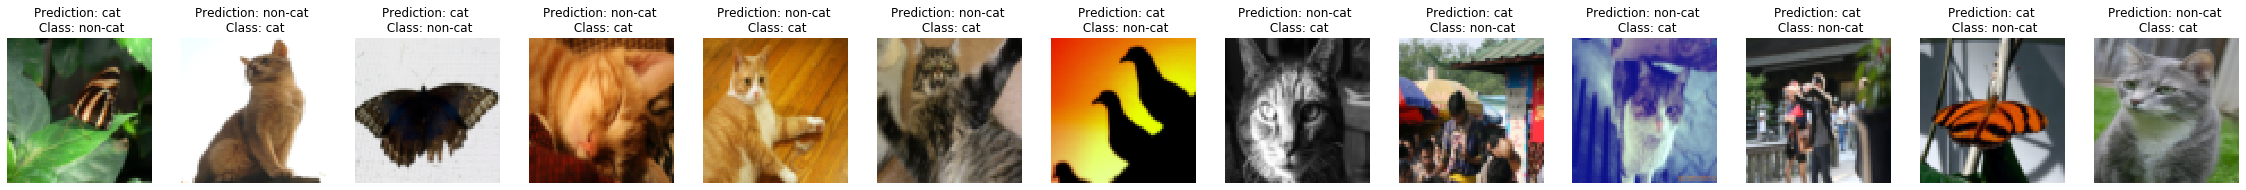

In [31]:
print_mislabeled_images(classes, test_x, test_y, pred_test)